# Another dataset from kaggle
- I found another dataset similar to this one but with 40k record
- https://www.kaggle.com/code/chanchal24/stroke-prediction-using-python/input?select=stroke_data.csv
### As per documentation
- sex: patient's gender (1: male; 0: female)
- age: patient's age (in years)
- hypertension: patient has ever had hypertension (1) or not (0)
- heart_disease: patient has ever had heart_disease(1) or not (0)
- ever_married: patient married (1) or not (0)
- work_type: patient job type: 0 - Never_worked, 1 - children, 2 - Govt_job, 3 - Self-employed, 4 - Private
- Residence_type: patient area: 1 - Urban, 0 - Rural
- avg_glucose_level: patient average blood sugar level
- bmi Body Mass Index
- smoking_status 1 - smokes, 0 - never smoked

In [1]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import matplotlib.pyplot as plt
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [3]:
# Load the data
df = pd.read_csv("stroke_data_kaggle.csv", sep=",")

In [4]:
print(df.head())

   sex   age  hypertension  heart_disease  ever_married  work_type  \
0  1.0  63.0             0              1             1          4   
1  1.0  42.0             0              1             1          4   
2  0.0  61.0             0              0             1          4   
3  1.0  41.0             1              0             1          3   
4  1.0  85.0             0              0             1          4   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               0       1  
2               1             171.23  34.4               1       1  
3               0             174.12  24.0               0       1  
4               1             186.21  29.0               1       1  


In [5]:
# check the coulumn name
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
# describe the dataframe
df.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [7]:
# describe the dataframe T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40910.0,51.327255,21.623969,-9.00,35.00,52.00,68.00,103.00
hypertension,40910.0,0.213835,0.410017,0.00,0.00,0.00,0.00,1.00
heart_disease,40910.0,0.127719,0.333781,0.00,0.00,0.00,0.00,1.00
ever_married,40910.0,0.821340,0.383072,0.00,1.00,1.00,1.00,1.00
work_type,40910.0,3.461134,0.780919,0.00,3.00,4.00,4.00,4.00
Residence_type,40910.0,0.514886,0.499784,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40910.0,122.075901,57.561531,55.12,78.75,97.92,167.59,271.74
bmi,40910.0,30.406355,6.835072,11.50,25.90,29.40,34.10,92.00
smoking_status,40910.0,0.488609,0.499876,0.00,0.00,0.00,1.00,1.00


In [8]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [9]:
# Check missing values
print(df.isnull().sum())

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


sex have 3 null values

In [10]:
# fill the null values with 0 female
df["sex"] = df["sex"].fillna(0.0)

In [11]:
# now lets explore the data feature by feature to understand
df.sex.value_counts()

1.0    22710
0.0    18200
Name: sex, dtype: int64

In [12]:
df["total_count"] = 1

In [13]:
Male_stroke_df = df[["sex", "stroke", "total_count"]].loc[df["sex"] == 1.0].groupby(by=["sex", "stroke"]).count()
Male_stroke_df

total_count
sex stroke             
1.0 0             12480
    1             10230

In [14]:
Female_stroke_df = df[["sex", "stroke", "total_count"]].loc[df["sex"] == 0.0].groupby(by=["sex", "stroke"]).count()
Female_stroke_df

total_count
sex stroke             
0.0 0              7970
    1             10230

In [15]:
# show possible values in gender
df["sex"].unique()

array([1., 0.])

In [16]:
# show possible values in ever_married
df["ever_married"].unique()

array([1, 0], dtype=int64)

In [17]:
# show possible values in work_type
df["work_type"].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [18]:
# show possible values in Residence_type
df["Residence_type"].unique()

array([1, 0], dtype=int64)

In [19]:
# show possible values in  smoking_status
df["smoking_status"].unique()

array([1, 0], dtype=int64)

In [20]:
# show possible values in  heart_disease
df["heart_disease"].unique()

array([1, 0], dtype=int64)

In [21]:
# show possible values in  hypertension
df["hypertension"].unique()

array([0, 1], dtype=int64)

In [22]:
# Exploratory Data Analysis (EDA)

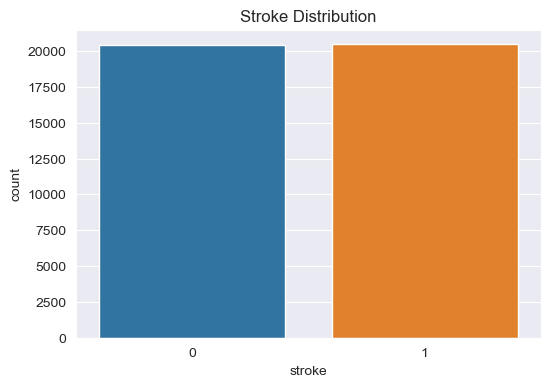

In [23]:
# Stroke distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Distribution')
plt.show()

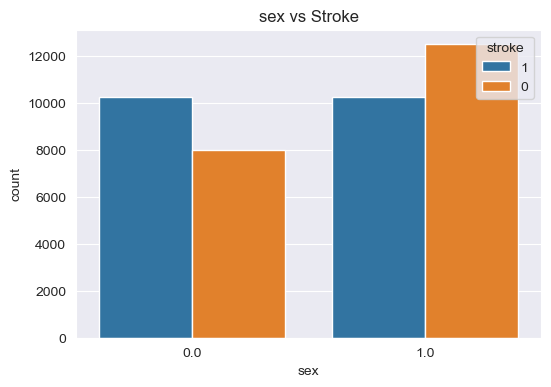

In [24]:
# Gender vs Stroke
df['stroke'] = df['stroke'].astype(str)
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='stroke', data=df)
plt.title('sex vs Stroke')
plt.show()


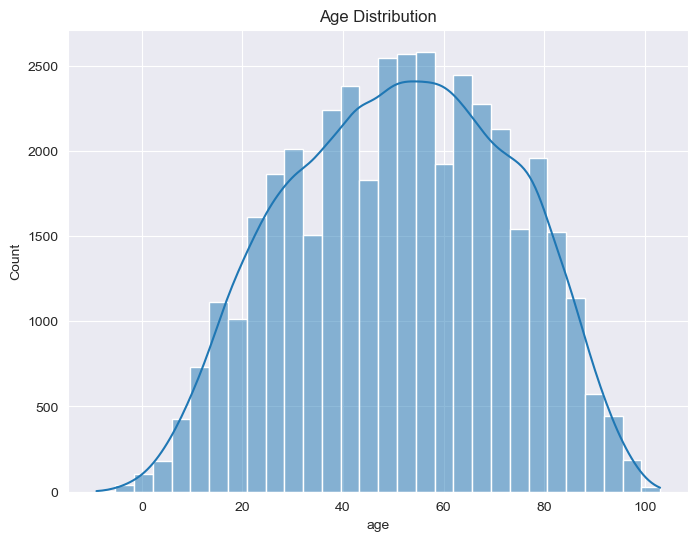

In [25]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


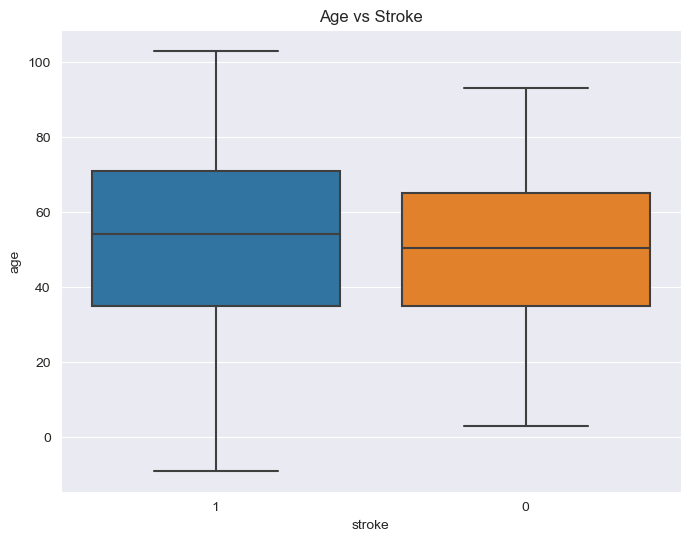

In [26]:
# Age vs Stroke
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age vs Stroke')
plt.show()


here Stroke risk show up with age between 35 and 65.

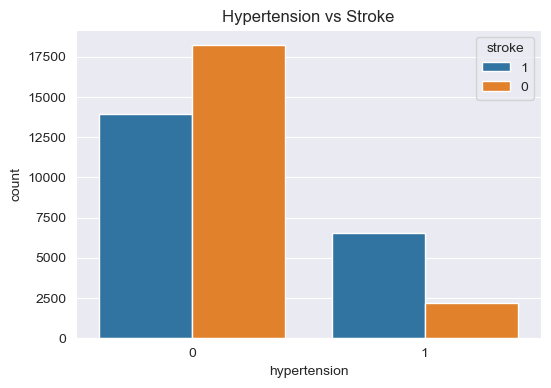

In [27]:
# Hypertension vs Stroke
# Contrary to typical expectations, stroke risk appears slightly higher among patients without hypertension in this dataset.
# possibly due to dataset sampling bias or missing detailed health records.
df['stroke'] = df['stroke'].astype(str)
plt.figure(figsize=(6, 4))
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Hypertension vs Stroke')
plt.show()

Stroke cases appear slightly more common among patients without diagnosed hypertension, which is different from the original dataset's pattern.
This could indicate sample bias, younger stroke cases, or incomplete health history documentation.

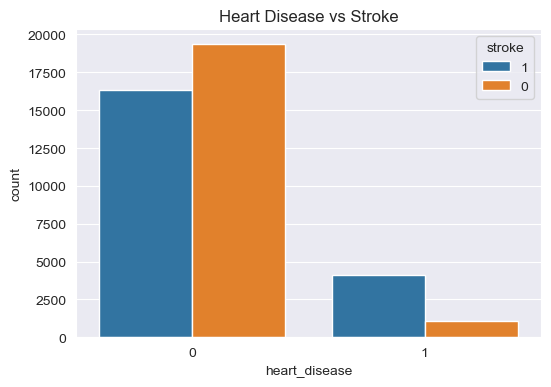

In [28]:
# Heart Disease vs Stroke

# The following plot shows the relationship between heart disease and stroke occurrence.
# Surprisingly, in this dataset, the stroke rate appears slightly higher among patients without heart disease compared to those with heart disease.
# possibly due to dataset sampling bias or missing detailed health records.

df['stroke'] = df['stroke'].astype(str)
plt.figure(figsize=(6, 4))
sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.title('Heart Disease vs Stroke')
plt.show()

stroke cases appear slightly more common among patients without diagnosed heart disease, which is different from the original dataset's pattern.
This could indicate sample bias, younger stroke cases, or incomplete health history documentation.

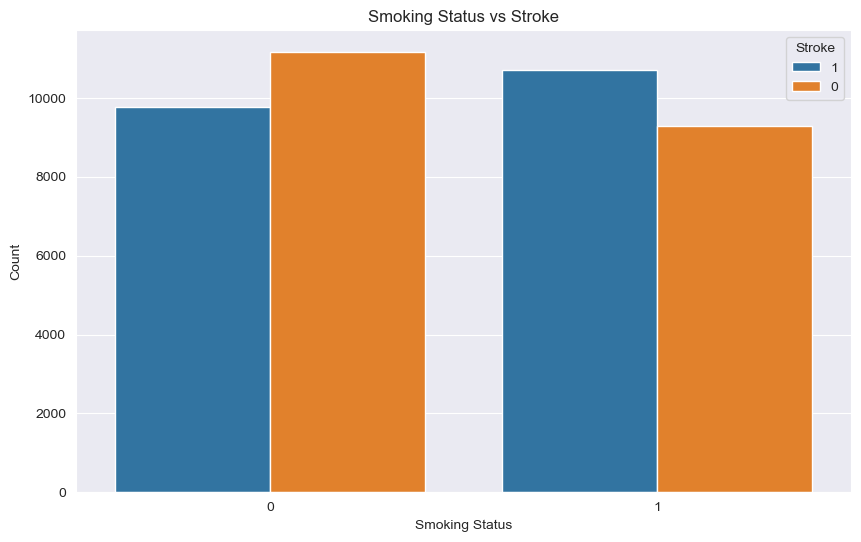

In [29]:
# Smoking Status Vs Stroke
df['stroke'] = df['stroke'].astype(str)

plt.figure(figsize=(10, 6))  # Define figure size
sns.countplot(x='smoking_status', hue='stroke', data=df)  # Create the countplot

plt.title('Smoking Status vs Stroke')  # Add title
plt.xlabel('Smoking Status')  # Add label to x-axis
plt.ylabel('Count')  # Add label to y-axis
plt.legend(title='Stroke')  # Set legend title to ensure readability

plt.show()

Former smokers and current smokers have a slightly higher stroke risk

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


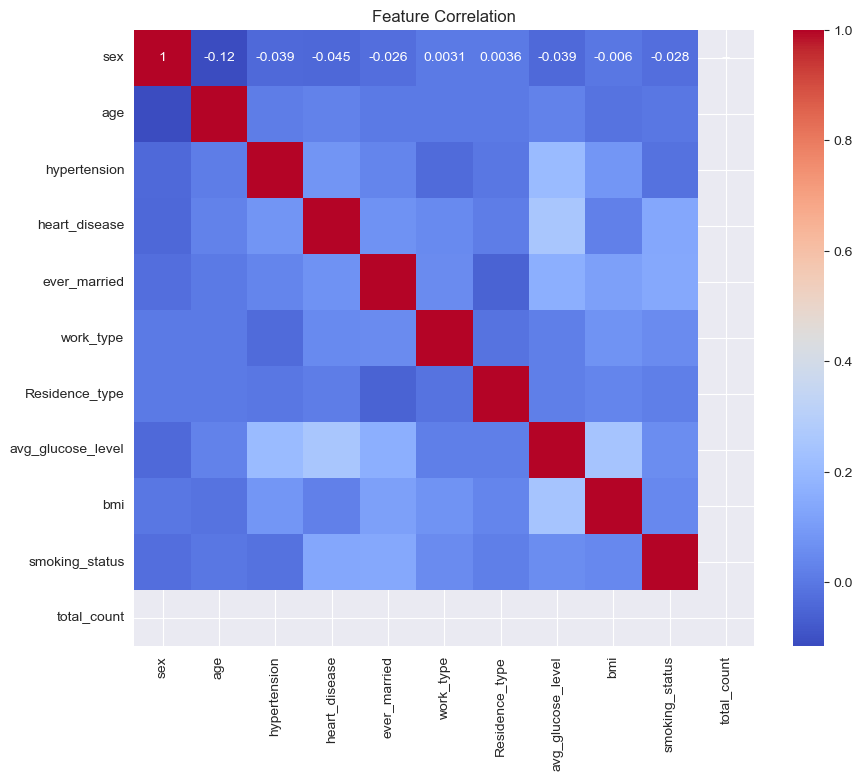

In [30]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Encode categorical variables

In [31]:
df = pd.concat([df, pd.get_dummies(df.sex, prefix='sex')], axis=1).drop(columns="sex")

In [32]:
df = pd.concat([df, pd.get_dummies(df.ever_married, prefix='ever_married')], axis=1).drop(columns="ever_married")

In [33]:
df = pd.concat([df, pd.get_dummies(df.smoking_status, prefix='smoking_status')], axis=1).drop(columns="smoking_status")

In [34]:
df = pd.concat([df, pd.get_dummies(df.Residence_type, prefix='Residence_type')], axis=1).drop(columns="Residence_type")

In [35]:
df.head(3)

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,total_count,sex_0.0,sex_1.0,ever_married_0,ever_married_1,smoking_status_0,smoking_status_1,Residence_type_0,Residence_type_1
0,63.0,0,1,4,228.69,36.6,1,1,0,1,0,1,0,1,0,1
1,42.0,0,1,4,105.92,32.5,1,1,0,1,0,1,1,0,1,0
2,61.0,0,0,4,171.23,34.4,1,1,1,0,0,1,0,1,0,1


In [36]:
df.describe()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,total_count,sex_0.0,sex_1.0,ever_married_0,ever_married_1,smoking_status_0,smoking_status_1,Residence_type_0,Residence_type_1
count,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.0,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,51.327255,0.213835,0.127719,3.461134,122.075901,30.406355,1.0,0.444879,0.555121,0.178660,0.821340,0.511391,0.488609,0.485114,0.514886
std,21.623969,0.410017,0.333781,0.780919,57.561531,6.835072,0.0,0.496958,0.496958,0.383072,0.383072,0.499876,0.499876,0.499784,0.499784
min,-9.000000,0.000000,0.000000,0.000000,55.120000,11.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,3.000000,78.750000,25.900000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,0.000000,0.000000,4.000000,97.920000,29.400000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,68.000000,0.000000,0.000000,4.000000,167.590000,34.100000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,103.000000,1.000000,1.000000,4.000000,271.740000,92.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

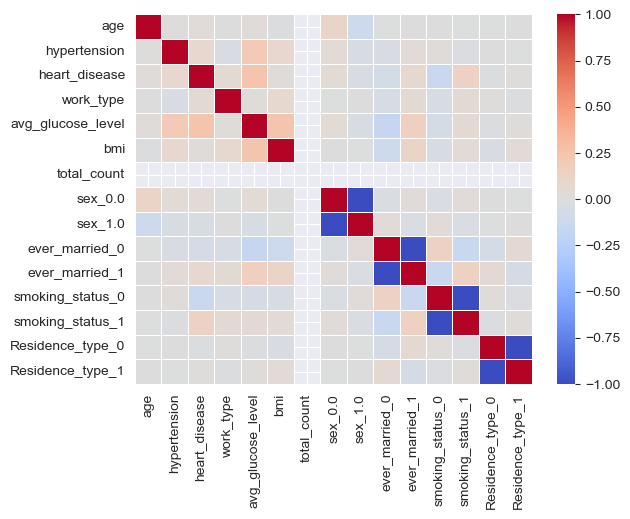

In [37]:
sns.heatmap(df.corr(), cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [38]:
# Split and Apply SMOTE
X = df.drop('stroke', axis=1)
y = df['stroke']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Model Training
will Try the below models:

1- Logistic Regression

2- Random Forest

3- XGBoost

In [40]:
# Model Training
# Logistic Regression
lRegression = LogisticRegression(max_iter=1000)
lRegression.fit(X_train, y_train)
y_pred_lRegression = lRegression.predict(X_test)

In [41]:
# Logistic Regression
y_pred_lRegression = y_pred_lRegression.astype(str)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lRegression))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      4090
           1       0.71      0.63      0.67      4092

    accuracy                           0.69      8182
   macro avg       0.69      0.69      0.69      8182
weighted avg       0.69      0.69      0.69      8182



In [42]:
# confusion matrix
cf = pd.DataFrame(columns=["0", "1"], index=["0", "1"])
cf.loc[:, :] = confusion_matrix(y_true=y_test, y_pred=y_pred_lRegression)
print(cf)
print('')
print(cf / len(y_test))

      0     1
0  3053  1037
1  1506  2586

          0         1
0  0.373136  0.126742
1  0.184063   0.31606


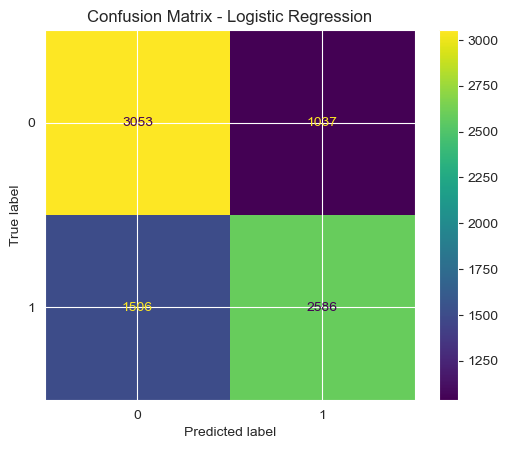

In [43]:
# confusion_matrix display
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lRegression)).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [44]:
# Random Forest
rForest = RandomForestClassifier()
rForest.fit(X_train, y_train)
y_pred_rForest = rForest.predict(X_test)


In [45]:
# Random Forest
#y_pred_rForest = y_pred_rForest.astype(int)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rForest))
#print(confusion_matrix(y_test, y_pred_rForest))

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4090
           1       0.99      1.00      1.00      4092

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



In [46]:
# confusion_matrix
cf_forest = pd.DataFrame(columns=["0", "1"], index=["0", "1"])
cf_forest.loc[:, :] = confusion_matrix(y_true=y_test, y_pred=y_pred_rForest)
print(cf_forest)
print('')
print(cf_forest / len(y_test))

      0     1
0  4057    33
1     0  4092

          0         1
0  0.495845  0.004033
1       0.0  0.500122


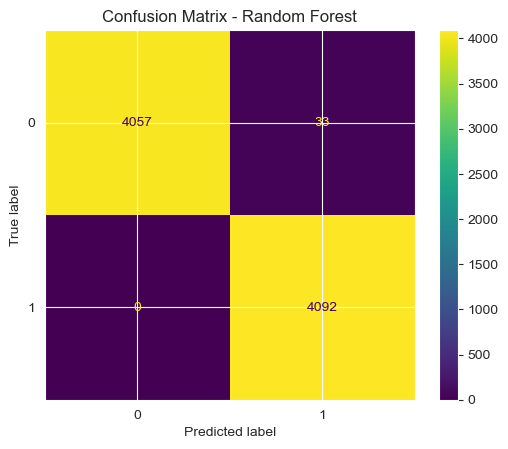

In [47]:
# confusion_matrix display
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rForest)).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [48]:
# XGBoost
# Convert y_train_bal, and y_test from strings to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [49]:
# XGBoost
y_pred_xgb = y_pred_xgb.astype(int)
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
#print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4090
           1       0.99      1.00      1.00      4092

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



In [50]:
# confusion_matrix
cf_xgb = pd.DataFrame(columns=["0", "1"], index=["0", "1"])
cf_xgb.loc[:, :] = confusion_matrix(y_true=y_test, y_pred=y_pred_xgb)
print(cf_xgb)
print('')
print(cf_xgb / len(y_test))

      0     1
0  4064    26
1     0  4092

        0         1
0  0.4967  0.003178
1     0.0  0.500122


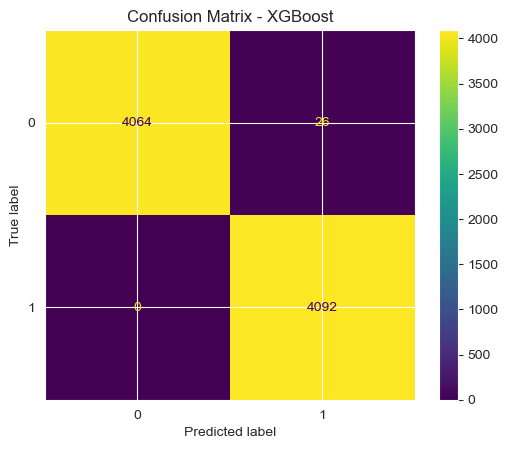

In [51]:
# confusion_matrix display
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb)).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

Model Evaluation all models

In [52]:
# Manual Testing
# Create a dictionary that matches exactly X_train columns
# Fill everything with 0 first
input_data = {col: 0 for col in X_train.columns}

# update the fields
input_data.update({
    'age': 67.0,  # Age
    'hypertension': 1,  # 1 if hypertension
    'heart_disease': 0,  # 1 if heart disease
    'avg_glucose_level': 228.69,  # Average glucose
    'bmi': 36.6,  # BMI
    'work_type': 2,  # Assume encoded work_type 2 (check your encoding!)
    'sex_1.0': 1,  # 1 if Male
    'ever_married_1': 1,  # 1 if Married
    'smoking_status_1': 1,  # 1 if smoked
    'Residence_type_1': 1  # 1 if Urban
})

In [53]:
# Convert to DataFrame
input_df = pd.DataFrame([input_data])

In [54]:
# Predict
predicted_class = xgb.predict(input_df)[0]
print("Prediction:", "Stroke" if predicted_class == 1 else "No Stroke")

Prediction: No Stroke
